In [2]:
from transformers import AutoTokenizer, AutoModel
from pandas.core.computation.check import NUMEXPR_INSTALLED
import plotnine as p9
from plotnine import * 
import json
import tqdm
from sklearn import decomposition
import pandas as pd

In [3]:
# load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/specter')
model = AutoModel.from_pretrained('allenai/specter')

In [6]:
cd assignment3_SiyanGuo/

/Users/amygdk/Desktop/Yale/2022/Fall2022/BIS 634/Assignments/Assignment3/assignment3_SiyanGuo


In [7]:
with open ('./example1_1.json','r')as file: #load papers dictionary
    papers=json.load(file)

In [8]:
#process dictionary of papers to find the SPECTER embeddings 

# we can use a persistent dictionary (via shelve) so we can stop and restart if needed
# alternatively, do the same but with embeddings starting as an empty dictionary
embeddings = {}
for pmid, paper in tqdm.tqdm(papers.items()):
    data = [paper["ArticleTitle"] + tokenizer.sep_token + ';'.join(paper["Abstract"])]
    inputs = tokenizer(
        data, padding=True, truncation=True, return_tensors="pt", max_length=512
    )
    result = model(**inputs)
    # take the first token in the batch as the embedding
    embeddings[pmid] = result.last_hidden_state[:, 0, :].detach().numpy()[0]

# turn our dictionary into a list
embeddings = [embeddings[pmid] for pmid in papers.keys()]

100%|██████████| 2000/2000 [15:17<00:00,  2.18it/s]


In [9]:
#768-dim vector for the 1st paper:
embeddings[1]

array([-4.39262569e-01,  1.55274153e+00,  2.03335539e-01,  4.86971736e-02,
        1.88423514e-01,  9.63540316e-01, -3.38385999e-02,  1.58606768e+00,
        1.04604602e+00,  1.06032801e+00, -5.95604956e-01, -2.08901614e-01,
       -2.73777157e-01, -6.06756985e-01, -1.69560120e-01,  4.57233012e-01,
       -6.67540133e-01,  1.46707147e-01, -1.07556546e+00, -1.92966342e-01,
       -2.97119975e-01, -2.56029904e-01,  8.08931112e-01,  1.22119009e+00,
       -9.93922949e-02, -2.64623672e-01,  8.46322849e-02, -1.43519270e+00,
        1.15110958e+00,  6.21852040e-01,  4.81005728e-01,  6.65059909e-02,
       -1.10238302e+00,  4.60384101e-01, -5.10421932e-01, -1.22714542e-01,
        7.88777471e-01, -2.57278442e-01,  6.49051547e-01, -2.75339127e-01,
       -2.80678481e-01, -1.75872147e-01, -4.88014907e-01,  1.09577215e+00,
        1.75523520e+00, -8.27565610e-01,  5.54772258e-01, -5.97544350e-02,
       -1.50143057e-01, -9.95492488e-02, -4.45359528e-01,  5.25787950e-01,
        8.67364854e-02,  

In [10]:
#PCA to identify first three principal components:

pca = decomposition.PCA(n_components=3)
embeddings_pca = pd.DataFrame(
    pca.fit_transform(embeddings),
    columns=['PC0', 'PC1', 'PC2']
)
embeddings_pca["query"] = [paper["query"] for paper in papers.values()]

In [11]:
embeddings_pca

,PC0,PC1,PC2,query
0,-3.663227,4.013699,0.089081,Alzheimer
1,-6.902868,1.485998,-4.306845,Alzheimer
2,-5.704850,-3.212616,0.821690,Alzheimer
3,-4.907791,-2.830629,1.019033,Alzheimer
4,-7.222981,-4.855144,2.202883,Alzheimer
...,...,...,...,...
1995,4.937490,-2.628404,1.721546,Cancer
1996,1.524949,3.268191,6.416871,Cancer
1997,1.793915,-4.104130,3.007911,Cancer
1998,3.093447,-6.495584,2.870327,Cancer


In [27]:
#2D scatter plot for comparing between first three principal components

In [21]:
PC0vsPC1=(ggplot(embeddings_pca, aes(x='PC0',y='PC1',color='query'))
 +geom_point()
 +theme_classic()
)

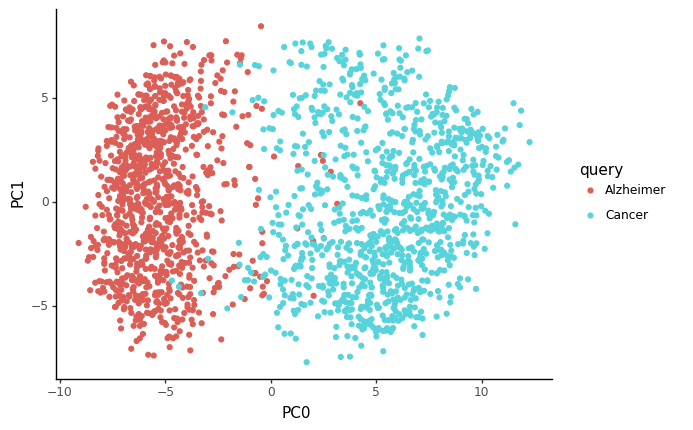

In [22]:
print(PC0vsPC1)

In [23]:
PC0vsPC2=(ggplot(embeddings_pca, aes(x='PC0',y='PC2',color='query'))
 +geom_point()
 +theme_classic()
)

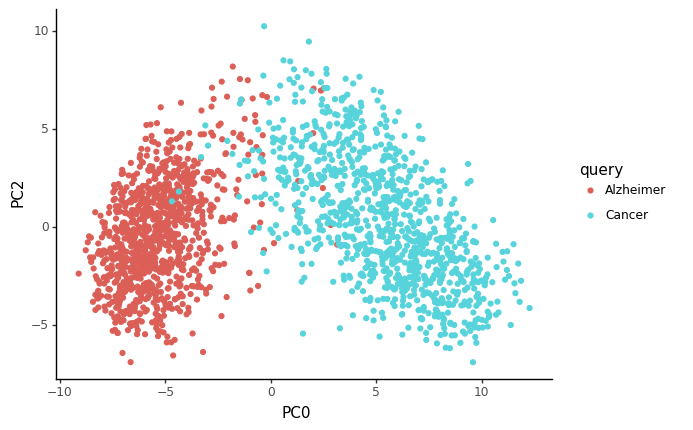

In [24]:
print(PC0vsPC2)

In [25]:
PC1vsPC2=(ggplot(embeddings_pca, aes(x='PC1',y='PC2',color='query'))
 +geom_point()
 +theme_classic()
)

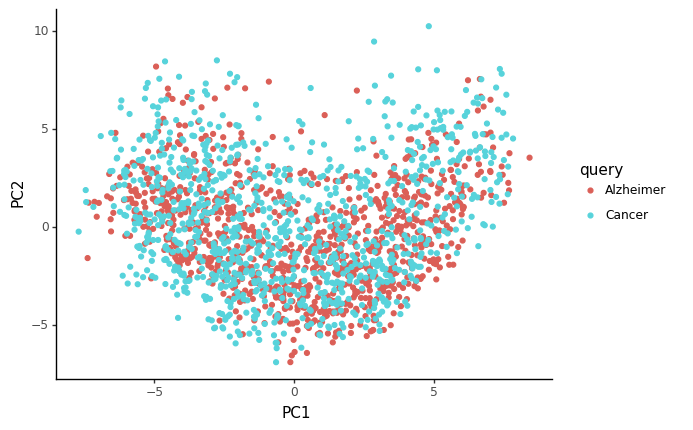

In [26]:
print(PC1vsPC2)